<a class="anchor" id="project-description"></a>
# Proje Açıklaması

Bu projede, müşterilerin gelecekte hizmeti kullanmaya devam edip etmeyeceğini, yani **churn (müşteri kaybı)** durumunu tahmin etmek amaçlanmaktadır. Veri seti, her müşteriye ait hesap geçmişi, kullanım verileri ve çeşitli etkileşim metriklerini içermektedir. Projenin ana hedefleri şunlardır:

- **Veri Keşfi (EDA):** Müşteri verilerinin yapısını, dağılımını ve temel özelliklerini analiz etmek.
- **Özellik Mühendisliği:** Müşteri davranışını daha iyi temsil edebilecek yeni özellikler oluşturmak.
- **Model Geliştirme:** Müşteri churn oranını tahmin etmek için çeşitli sınıflandırma modelleri (örneğin, Logistic Regression, Random Forest, XGBoost) uygulamak.
- **Model Değerlendirme:** Geliştirilen modellerin performansını Accuracy, Precision, Recall, F1-Score, ROC-AUC gibi metrikler ile değerlendirmek.

Bu çalışma, müşteri davranışlarının detaylı bir şekilde analiz edilmesi ve churn riskine sahip müşterilerin erken tespiti için stratejik kararlar alabilmeyi sağlayacak bir adım niteliğindedir.


## İçindekiler

1. [Proje Açıklaması](#project-description)  
2. [EDA (Exploratory Data Analysis)](#eda)  
   - 2.1 [Gerekli Kütüphaneler](#gerekli-kutuphaneler)  
   - 2.2 [Veri Seti Yükleme](#veri-seti-yukleme)  
   - 2.3 [Veri Seti İncelemesi](#veri-seti-incelemesi)  
   - 2.4 [Eksik Değer Analizi](#eksik-deger-analizi)  
   - 2.5 [Churn Dağılımı](#churn-dagilimi)  
   - 2.6 [Dağılım Grafikleri](#dagilim-grafigi)  
   - 2.7 [Churn ile İlişkili Değişkenlerin İncelenmesi](#churn-ilişkili-degiskenler)  
   - 2.8 [Korelasyon Analizi](#korelasyon-analizi)  
   - 2.9 [Zaman ve Diğer Değişkenlerin İncelenmesi](#zaman-degiskenleri)  
   - 2.10 [Outlier Analizi](#outlier-analizi)  
   - 2.11 [Veri Temizleme ve Normalizasyon](#veri-temizleme-ve-normalizasyon)  
   - 2.12 [İleri Düzey İstatistiksel Testler](#ileri-düzey-istatistiksel-testler)  
   - 2.13 [Ek Zaman Serisi Analizi](#ek-zaman-serisi-analizi)  
3. [Özellik Mühendisliği ve Modelleme](#ozellik-muhendisligi-ve-modelleme)  
   - 3.1 [Yeni Özellikler Üretme](#ozellik-secimi-ve-yeni-ozellikler-uretme)  
   - 3.2 [Veri Setinin Hazırlanması: Eğitim ve Test Ayrımı ve LightGBM Modeli](#veri-setinin-hazirlanmasi-egitim-ve-test-ayrimi)  
   - 3.3 [SHAP Değerleri (Özellik Önem Analizi)](#shap-degerleri)

<a class="anchor" id="eda"></a>
# 1. EDA
Bu bölümde, veri setinin genel yapısını anlamak ve ileride kullanılacak özellikler hakkında bilgi sahibi olmak amacıyla Exploratory Data Analysis (EDA) adımlarını gerçekleştireceğiz.


<a class="anchor" id="gerekli-kutuphaneler"></a>
## 1.1 Gerekli Kütüphaneler
Bu adımda, veri analizi ve görselleştirme işlemleri için gerekli kütüphaneleri içe aktarıyoruz.


In [1]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook üzerinde grafiklerin inline görüntülenmesi için:
%matplotlib inline

# Grafik stilini ayarlayalım
sns.set(style="whitegrid")


C:\Users\Hakan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a class="anchor" id="veri-seti-yukleme"></a>
## 1.2 Veri Seti Yükleme
Veri setimizi CSV dosyası olarak yüklüyoruz. Dosya yolunu kendi dosya konumunuza göre ayarlamayı unutmayın.


In [2]:
import os
from pathlib import Path
import pandas as pd

# Mevcut çalışma dizini: "C:\Users\Hakan\Downloads\sms_spam_detection\teknasyon-case-ai-datascientist\notebooks"
# Veri "datasets" klasörü ise, notebooks klasörünün üst dizininde bulunuyorsa:
base_dir = Path.cwd().parent  # Çalışma dizininin (notebooks) üst dizinine geçer.
dataset_path = base_dir / "datasets" / "churn_train.csv"
df = pd.read_csv(dataset_path)

In [3]:
df.head(10)

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,2013,6,202550,1835,0,1,9.66,2.26,1,1,...,45.35,0.0,26.62,0.00,390,10,115,10,0.00,0
1,2013,6,930164,536,0,10,54.92,0.60,1,1,...,24.98,0.0,23.90,0.00,52,0,52,0,0.00,0
2,2013,6,46907,1046,0,1,16.25,13.47,1,1,...,116.47,15.2,65.65,31.28,262,0,199,11,0.00,0
3,2013,8,1174456,15947,0,8,0.00,0.00,1,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.00,0
4,2013,6,300131,1630,0,1,6.14,3.76,1,1,...,30.38,0.0,8.00,0.00,61,0,60,0,0.00,0
5,2013,6,315688,1373,0,1,6.84,6.38,1,1,...,99.87,0.0,40.80,0.00,3,0,3,0,0.00,0
6,2013,6,352185,1401,0,6,0.48,3.79,1,1,...,91.03,0.0,50.85,2.13,6,0,0,0,0.00,0
7,2013,6,931894,535,0,16,3.24,0.00,1,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.00,0
8,2013,8,1193499,15947,0,8,0.00,0.00,0,0,...,0.00,0.0,0.00,0.00,0,0,0,0,0.00,1
9,2013,6,93082,1986,0,1,31.49,9.80,1,1,...,149.88,0.0,123.62,0.00,200,0,195,0,2.25,0


<a class="anchor" id="veri-seti-incelemesi"></a>
## 1.3 Veri Seti İncelemesi
Veri setimizin genel yapısını, sütun isimlerini, veri tiplerini ve boyutlarını öğreniyoruz.


In [4]:
# Veri setinin genel bilgileri: sütunlar, veri tipleri ve eksik değerler hakkında özet
df.info()

# Sayısal sütunlar için temel istatistiksel özet
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        60000 non-null  int64  
 1   month                                       60000 non-null  int64  
 2   user_account_id                             60000 non-null  int64  
 3   user_lifetime                               60000 non-null  int64  
 4   user_intake                                 60000 non-null  int64  
 5   user_no_outgoing_activity_in_days           60000 non-null  int64  
 6   user_account_balance_last                   60000 non-null  float64
 7   user_spendings                              60000 non-null  float64
 8   user_has_outgoing_calls                     60000 non-null  int64  
 9   user_has_outgoing_sms                       60000 non-null  int64  
 10  user_use_g

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
count,60000.0,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,2013.0,6.257100,5.954385e+05,4010.707750,0.041083,64.040017,9.626972,6.822739,0.804683,0.602783,...,98.643405,1.026727,66.959340,3.016812,101.512717,7.273817,62.447717,3.049600,5.660140,0.209150
std,0.0,0.662827,4.293153e+05,6062.226966,0.198485,264.162578,18.506703,13.624206,0.396448,0.489326,...,193.271642,7.481040,149.737559,19.646001,264.814126,35.763351,187.079702,25.564016,71.594183,0.406705
min,2013.0,6.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,-30.060000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,6.000000,2.511112e+05,456.000000,0.000000,1.000000,0.040000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.0,6.000000,4.135095e+05,1217.000000,0.000000,2.000000,5.260000,2.280000,1.000000,1.000000,...,30.730000,0.000000,15.400000,0.000000,14.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,2013.0,6.000000,1.041391e+06,1985.000000,0.000000,8.000000,12.910000,8.090000,1.000000,1.000000,...,111.285000,0.000000,69.872500,0.000000,96.000000,1.000000,51.000000,0.000000,0.000000,0.000000
max,2013.0,8.000000,1.196944e+06,15947.000000,1.000000,1307.000000,1775.710000,510.110000,1.000000,1.000000,...,4953.120000,473.250000,4772.370000,1149.120000,18637.000000,2829.000000,13860.000000,4692.000000,5571.220000,1.000000


## 1.3 Veri Seti İncelemesi

Aşağıdaki bilgiler, `df.info()` ve `df.describe()` çıktılarının özetini sunmaktadır:

- **Veri setinin boyutu**: 60.000 satır, 66 sütun  
- **Eksik değer durumu**: Veri setinde eksik değer gözlemlenmemiştir.  
- **Veri tipi dağılımı**:  
  - 28 sütun `float64`  
  - 38 sütun `int64`  
- **Bellek kullanımı**: Yaklaşık 30.2 MB  
- **Önemli sütun örnekleri**:  
  - `user_account_balance_last`, `calls_outgoing_count`, `sms_outgoing_count`, `gprs_usage` vb. (kullanım davranışları)  
  - `reloads_count`, `reloads_sum` (yükleme istatistikleri)  
  - `last_100_...` sütunları (son 100 işlem/arama/SMS bazında özet)  
- **Hedef sütun**: `churn` (0 veya 1)  


<a class="anchor" id="eksik-deger-analizi"></a>
## 1.4 Eksik Değer Analizi
Veri setinde eksik değer olup olmadığını kontrol ediyoruz. Bu, ileride veri temizleme işlemlerini yaparken yol gösterici olacaktır.


In [5]:
# Her sütunda eksik değer sayısını kontrol edelim
missing_values = df.isnull().sum()
print(missing_values)


year                                     0
month                                    0
user_account_id                          0
user_lifetime                            0
user_intake                              0
                                        ..
last_100_sms_outgoing_to_onnet_count     0
last_100_sms_outgoing_to_offnet_count    0
last_100_sms_outgoing_to_abroad_count    0
last_100_gprs_usage                      0
churn                                    0
Length: 66, dtype: int64


In [6]:
 df.isnull().sum().sum()

0

Eksik veri yok.

<a class="anchor" id="churn-dagilimi"></a>
## 1.5 Churn Dağılımı
Hedef değişkenimiz olan 'churn' sütununun dağılımını inceleyerek, sınıf dengesizliği olup olmadığını gözlemliyoruz.


churn
0    47451
1    12549
Name: count, dtype: int64


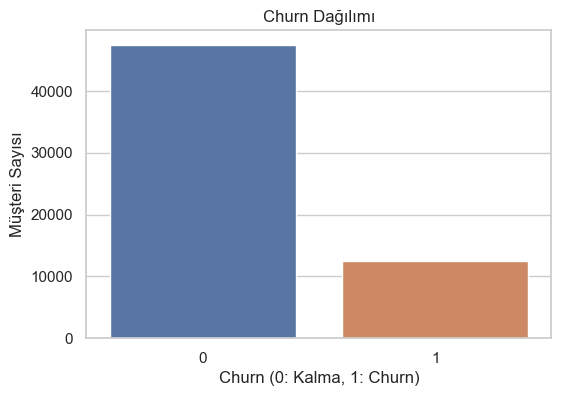

In [7]:
# Churn sütunundaki sınıf dağılımı
churn_counts = df['churn'].value_counts()
print(churn_counts)

# Churn dağılımını görselleştirelim
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title("Churn Dağılımı")
plt.xlabel("Churn (0: Kalma, 1: Churn)")
plt.ylabel("Müşteri Sayısı")
plt.show()




- **Toplam Müşteri Sayısı**: 60.000  
- **Churn = 0 (Kalmaya devam edenler)**: 47.451 (~%79)  
- **Churn = 1 (Operatörden ayrılanlar)**: 12.549 (~%21)

Bu dağılım, sınıflar arasında belirli bir dengesizlik olduğunu gösterse de aşırıya kaçan bir oran görülmemektedir.  
Modelleme ve değerlendirme aşamalarında, özellikle **Precision**, **Recall**, **F1-Score** ve **ROC-AUC** gibi metrikleri değerlendirirken bu dengesizlik göz önünde bulundurulmalıdır.


<a class="anchor" id="dagilim-grafigi"></a>
## 1.6 Dağılım Grafikleri
Önemli değişkenlerden bazıları için dağılım grafiklerini çizerek, verinin genel dağılımını görselleştiriyoruz. Örneğin, 'user_lifetime' ve 'user_spendings' sütunlarını ele alıyoruz.


C:\Users\Hakan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


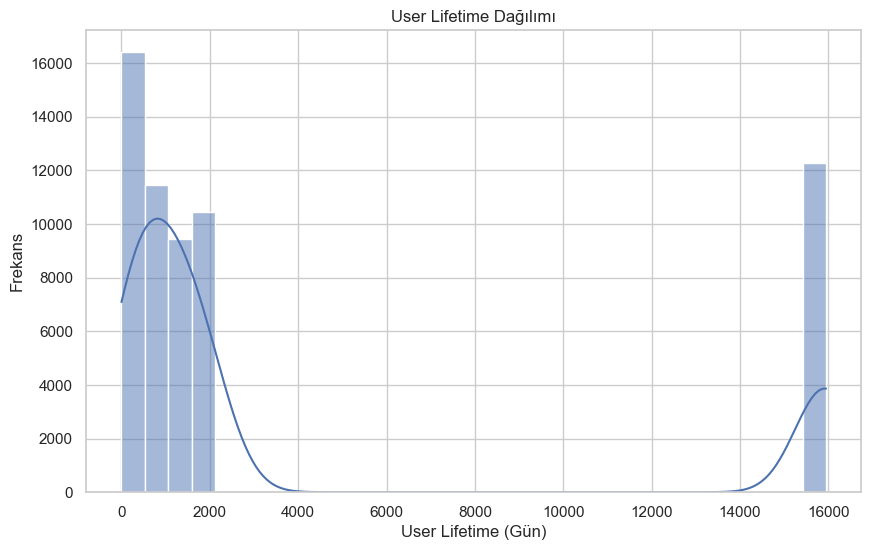

C:\Users\Hakan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


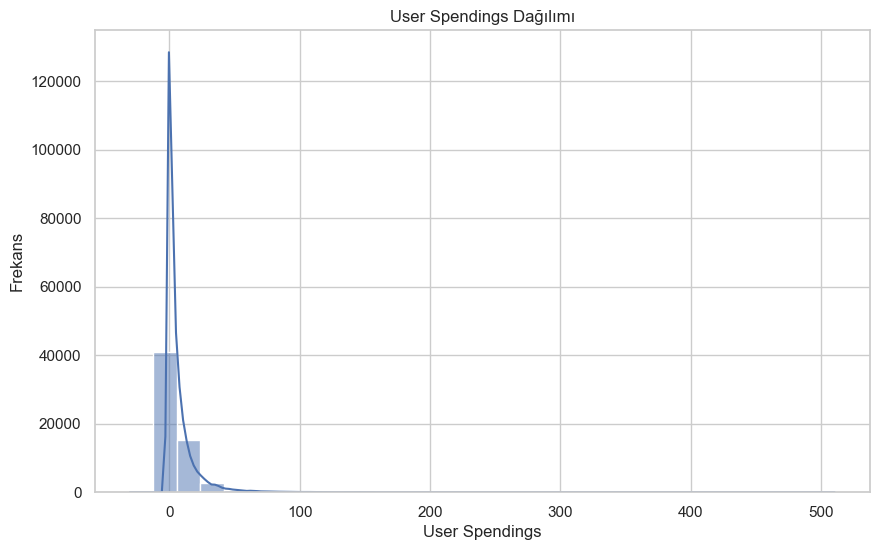

In [8]:
# Kullanıcı ömrü (user_lifetime) dağılımı
plt.figure(figsize=(10,6))
sns.histplot(df['user_lifetime'], kde=True, bins=30)
plt.title("User Lifetime Dağılımı")
plt.xlabel("User Lifetime (Gün)")
plt.ylabel("Frekans")
plt.show()

# Kullanıcı harcamaları (user_spendings) dağılımı
plt.figure(figsize=(10,6))
sns.histplot(df['user_spendings'], kde=True, bins=30)
plt.title("User Spendings Dağılımı")
plt.xlabel("User Spendings")
plt.ylabel("Frekans")
plt.show()


## Dağılım Grafikleri

### User Lifetime Dağılımı
- 0–2.000 gün aralığında yoğun bir yığılma bulunmaktadır.
- 14.000–16.000 gün aralığında da ikinci bir tepe noktası görülmektedir.
- Bu iki ayrı pik, veri setinde eski ve yeni müşterilerin belirgin bir şekilde ayrıştığını düşündürebilir.

### User Spendings Dağılımı
- Harcamaların büyük bölümü 0–10 TL aralığında toplanmış olup, veride ciddi bir çarpıklık (skewness) mevcuttur.
- Düşük harcama yapan kullanıcı sayısının çok yüksek olduğu, yüksek harcama değerlerinin ise seyrek fakat uzun bir “kuyruk” oluşturduğu gözlemlenmektedir.


<a class="anchor" id="churn-ilişkili-degiskenler"></a>
## 1.7 Churn ile İlişkili Değişkenlerin İncelenmesi
Churn olan ve olmayan müşterilerin bazı özelliklerini karşılaştırarak, hedef değişkenle ilişkili olabilecek değişkenleri belirliyoruz. Örneğin, 'user_spendings' değişkeninin churn durumuna göre dağılımını kutu grafiği ile inceliyoruz.


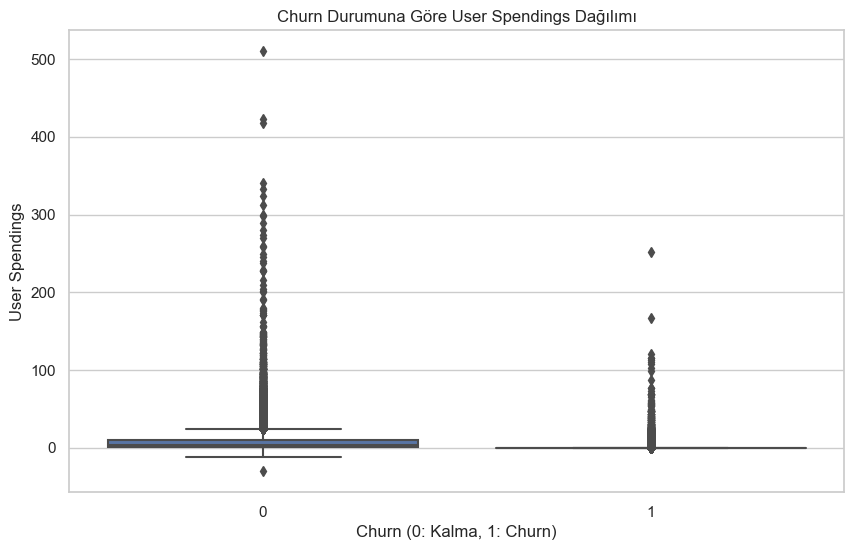

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='churn', y='user_spendings', data=df)
plt.title("Churn Durumuna Göre User Spendings Dağılımı")
plt.xlabel("Churn (0: Kalma, 1: Churn)")
plt.ylabel("User Spendings")
plt.show()


## Churn Durumuna Göre User Spendings Dağılımı

- **Churn = 0 (Kalmaya devam edenler)**:  
  - Harcama değerleri çoğunlukla 0–10 TL aralığında yoğunlaşmakla birlikte 100 TL ve üstüne çıkan önemli miktarda uç değer (outlier) görülmektedir.  
  - Arada 300–500 TL seviyelerinde dahi harcamalar mevcuttur.  

- **Churn = 1 (Operatörden ayrılanlar)**:  
  - Benzer şekilde, büyük bölümü düşük miktarlarda harcama yapsa da daha az sayıda ama yine yüksek harcama outlier’ları bulunmaktadır.  
  - Genel olarak medyan ve alt/üst çeyrekler “kalmaya devam edenler” grubuna kıyasla daha düşük gibi görünmektedir.  

Bu tablo, **yüksek harcama eğilimindeki kullanıcıların operatörde kalma olasılığının daha yüksek** olabileceği yönünde bir ön fikir verebilir. Ancak kesin yargıya varmadan önce diğer faktörler de (arama süreleri, kullanıcı yaşı, paket tipleri vb.) dikkate alınarak detaylı analiz yapılması önemlidir.


<a class="anchor" id="korelasyon-analizi"></a>
## 1.8 Korelasyon Analizi
Veri setindeki sayısal değişkenler arasındaki korelasyonları ısı haritası ile görselleştiriyoruz. Böylece, hangi değişkenlerin churn ile daha yüksek korelasyona sahip olduğunu tespit edebiliriz.


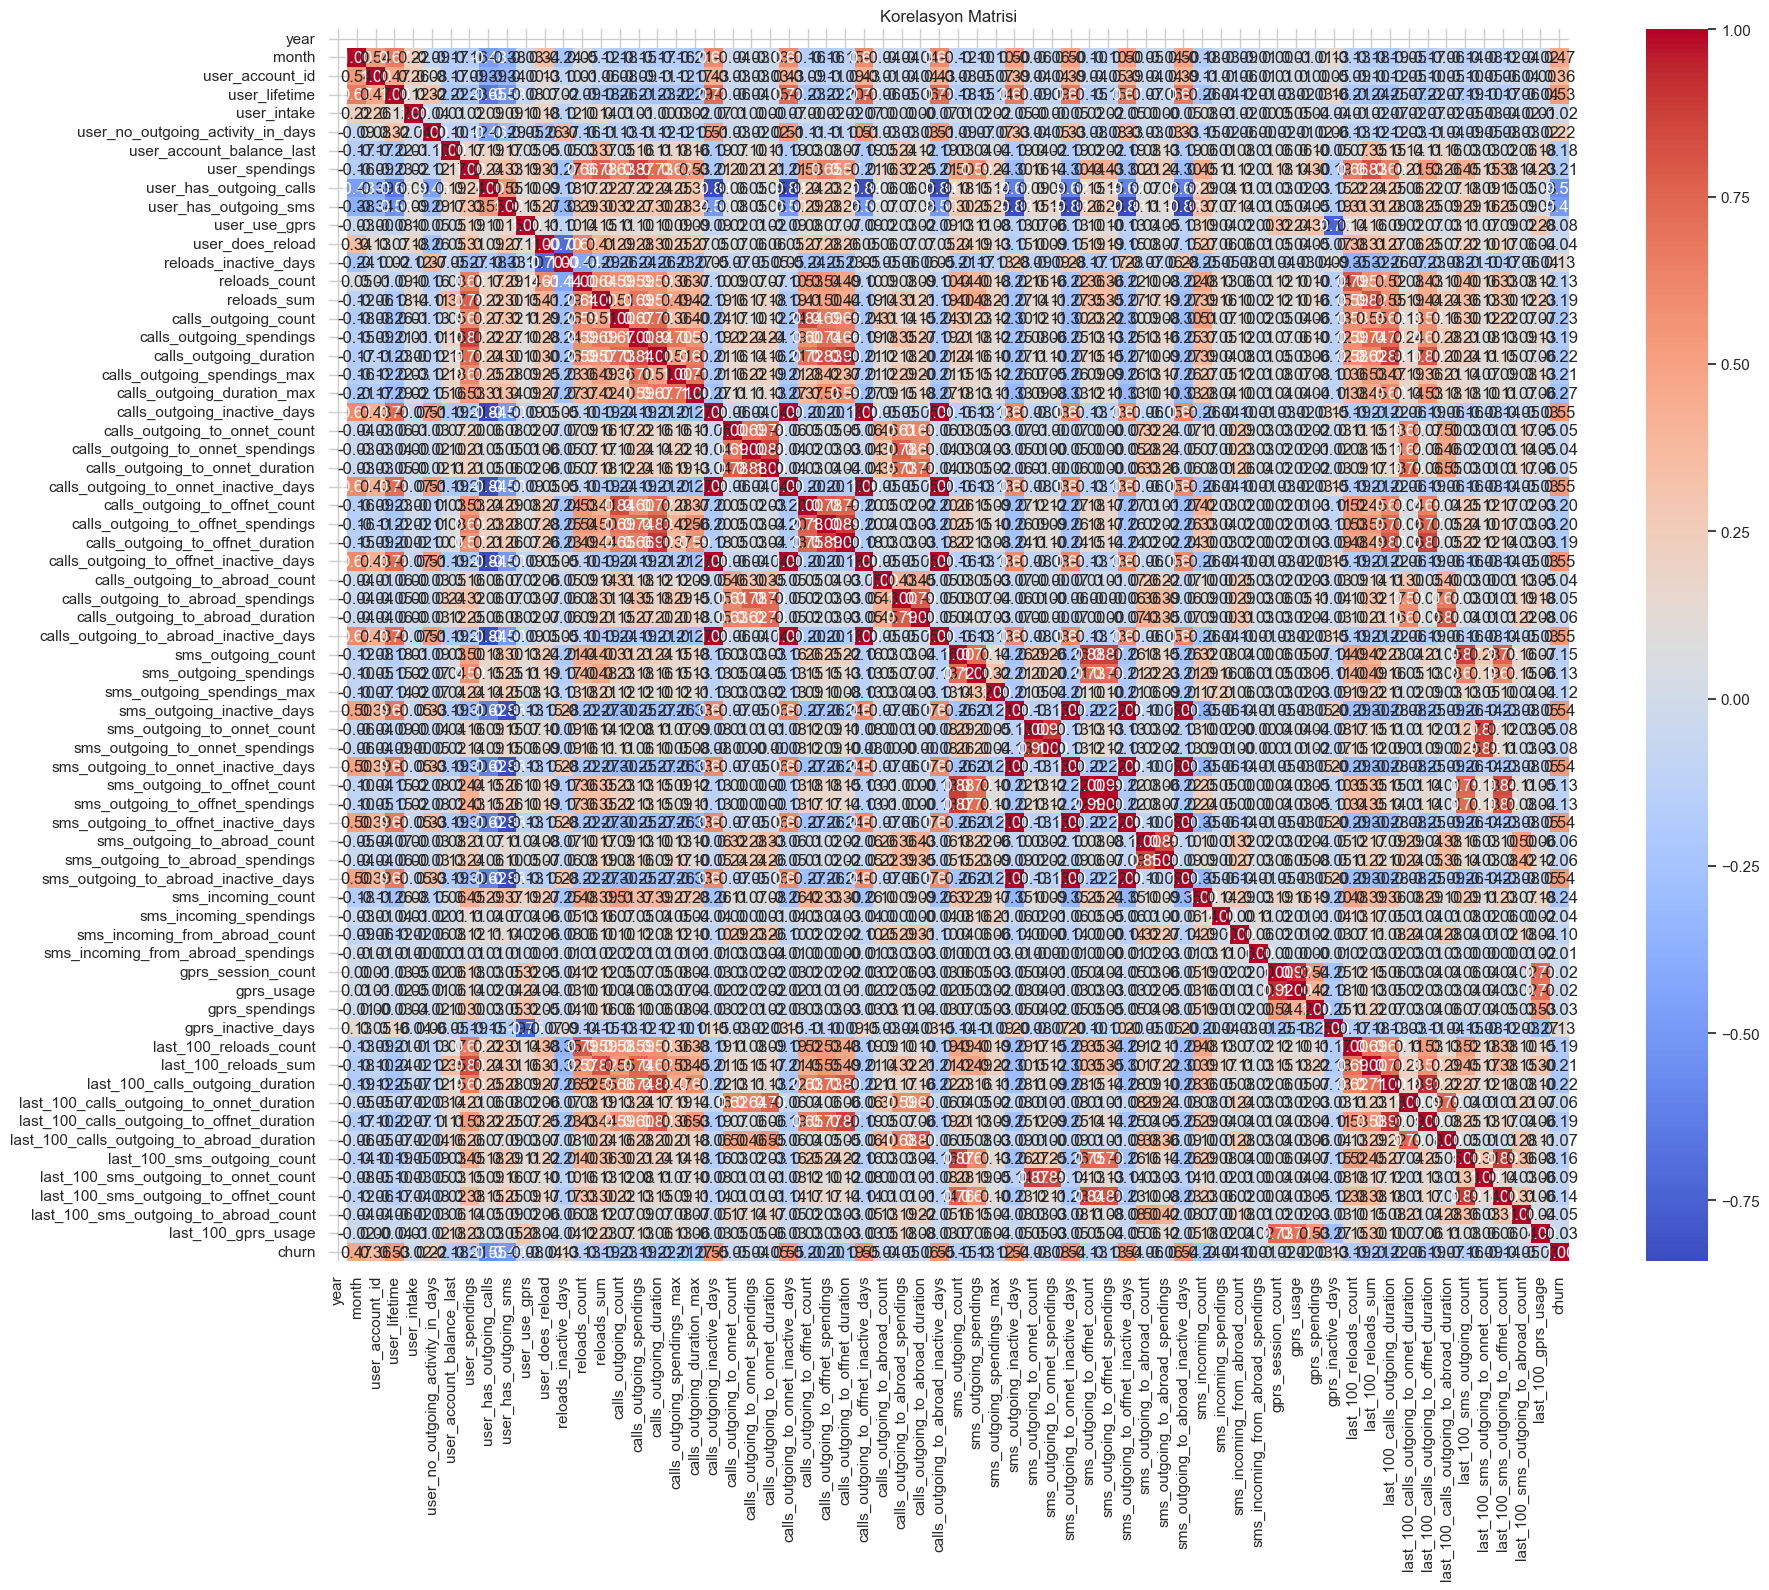

churn                                     1.000000
calls_outgoing_inactive_days              0.546338
calls_outgoing_to_abroad_inactive_days    0.546338
calls_outgoing_to_offnet_inactive_days    0.546338
calls_outgoing_to_onnet_inactive_days     0.546338
                                            ...   
sms_incoming_count                       -0.242837
calls_outgoing_duration_max              -0.268828
user_has_outgoing_sms                    -0.489288
user_has_outgoing_calls                  -0.553745
year                                           NaN
Name: churn, Length: 66, dtype: float64


In [10]:
# Korelasyon matrisi hesaplanıp ısı haritası şeklinde görselleştiriliyor
plt.figure(figsize=(20,16))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

# Churn ile yüksek korelasyona sahip değişkenleri inceleyelim
churn_corr = corr_matrix['churn'].sort_values(ascending=False)
print(churn_corr)


## Korelasyon Analizi

- `churn` değeriyle en yüksek pozitif korelasyona sahip değişkenler:
  - **calls_outgoing_inactive_days** (0.546)  
  - **calls_outgoing_to_onnet_inactive_days** (0.546)  
  - **calls_outgoing_to_offnet_inactive_days** (0.546)  
  - **calls_outgoing_to_abroad_inactive_days** (0.546)  

  Bu durum, **giden çağrılar konusunda uzun süre pasif kalan** kullanıcıların churn etme olasılıklarının daha yüksek olduğunu gösteriyor.

- `churn` ile en yüksek negatif korelasyona sahip değişkenler:
  - **user_has_outgoing_calls** (−0.553)  
  - **user_has_outgoing_sms** (−0.489)  

  **Arama veya SMS gerçekleştiren** kullanıcıların churn etme ihtimalinin görece **daha düşük** olduğu söylenebilir.

- Diğer bazı olumsuz korelasyonlar da (örneğin, `sms_incoming_count` ve `calls_outgoing_duration_max`) göze çarpmaktadır, ancak bunların değeri yukarıdaki değişkenlere kıyasla daha düşük seviyededir.

- **Özellikle yüksek pozitif ve negatif korelasyonlara sahip değişkenlerin** modelde önemli özellikler (feature importance) olarak öne çıkması beklenebilir. Yine de nihai kararı, denenecek farklı makine öğrenmesi modellerinin önem değerlerini ve performanslarını inceleyerek vermek gerekir.


<a class="anchor" id="zaman-degiskenleri"></a>
## 1.9 Zaman ve Diğer Değişkenlerin İncelenmesi
Eğer veri setinizde 'year' ve 'month' gibi zaman bileşenleri varsa, bunları kullanarak yıllara veya aylara göre churn oranını inceleyebilirsiniz.


C:\Users\Hakan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hakan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hakan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


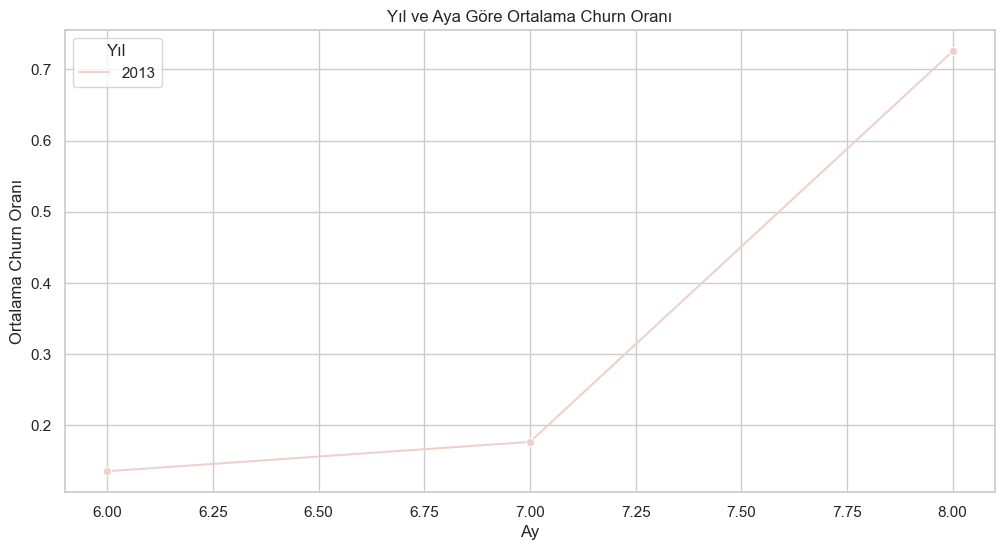

In [11]:
# Yıl ve aya göre churn oranını hesaplayalım
churn_by_time = df.groupby(['year', 'month'])['churn'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=churn_by_time, x='month', y='churn', hue='year', marker='o')
plt.title("Yıl ve Aya Göre Ortalama Churn Oranı")
plt.xlabel("Ay")
plt.ylabel("Ortalama Churn Oranı")
plt.legend(title='Yıl')
plt.show()


## Yıl ve Aya Göre Ortalama Churn Oranı

- Grafikte **2013 yılının 6. ayından 8. ayına** (Haziran–Ağustos) kadarki ortalama churn oranı görülmektedir.  
- **Haziran ayı** civarında churn oranı yaklaşık %15–%20 düzeylerindeyken, **Temmuz sonuna doğru** bu oranda belirgin bir artış başlamaktadır.  
- **Ağustos ayında** ise churn oranının **%70’lere** kadar yükseldiği gözlenmektedir.  
- Bu **keskin yükseliş**, yaz aylarında yaşanan mobil kullanım alışkanlıklarındaki değişim, tarife güncellemeleri, rekabetçi kampanyalar veya diğer mevsimsel faktörler gibi çeşitli sebeplerden kaynaklanıyor olabilir.


<a class="anchor" id="outlier-analizi"></a>
## 1.10 Outlier Analizi

Bu adımda, özellikle `user_spendings` gibi çarpık dağılıma sahip değişkenlerde uç değerleri belirlemek amacıyla boxplot grafikleri kullanıyoruz.  
- **Amaç**: Uç değerlerin varlığını tespit etmek ve gerekirse bu değerler üzerinde winsorization, log dönüşümü veya diğer yöntemlerle düzenleme yapmayı planlamak.


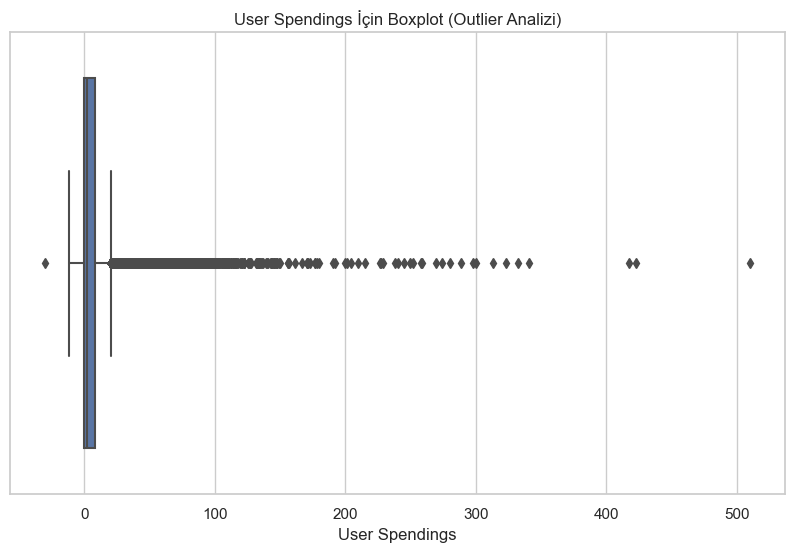

IQR: 8.09
Alt sınır: -12.135 Üst sınır: 20.225
Outlier sayısı: 5129


In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['user_spendings'])
plt.title("User Spendings İçin Boxplot (Outlier Analizi)")
plt.xlabel("User Spendings")
plt.show()

# Alternatif olarak, IQR yöntemiyle uç değerleri tespit edebiliriz:
Q1 = df['user_spendings'].quantile(0.25)
Q3 = df['user_spendings'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

# Uç değer sınırları
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Alt sınır:", lower_bound, "Üst sınır:", upper_bound)

# Uç değerleri filtreleyelim:
outliers = df[(df['user_spendings'] < lower_bound) | (df['user_spendings'] > upper_bound)]
print("Outlier sayısı:", outliers.shape[0])


## User Spendings Boxplot (Outlier Analizi)

- Dağılımın büyük bir kısmının **0–10 TL aralığında** yoğunlaştığı görülmektedir.
- Boxplot’ta **kuvvetli bir sağ kuyruk (right skew)** ve çok sayıda uç değer (`outlier`) mevcuttur.
- Ortalama (mean) ve medyan arasındaki farklılık, verinin çarpık (skewed) yapısını daha da belirgin kılabilir.
- **200 TL üzeri** harcamalar daha nadir olsa da veri setinde **300–500 TL** seviyelerinde harcama yapan kullanıcıların da var olduğu görülmektedir.
- Çarpıklığın fazla olması nedeniyle modelleme aşamasında **log dönüşümü** veya **winsorizing** gibi teknikler değerlendirilerek verinin dağılımı iyileştirilebilir.


<a class="anchor" id="veri-temizleme-ve-normalizasyon"></a>
## 1.11 Veri Temizleme ve Normalizasyon

- **Eksik Değerler**: Mevcut veri setinde eksik değer bulunmamaktadır.  
- **Dönüşümler**:  
  - Çarpık dağılıma sahip `user_spendings` gibi değişkenler için log dönüşümü uygulanabilir.  
  - Gerekirse diğer numerik değişkenler standardizasyon veya normalizasyon teknikleri (örn. Min-Max Scaling, StandardScaler) ile dönüştürülebilir.


C:\Users\Hakan\AppData\Local\Temp\ipykernel_30560\3221172384.py:2: RuntimeWarning: invalid value encountered in log
  df['user_spendings_log'] = df['user_spendings'].apply(lambda x: np.log(x + 1))
C:\Users\Hakan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


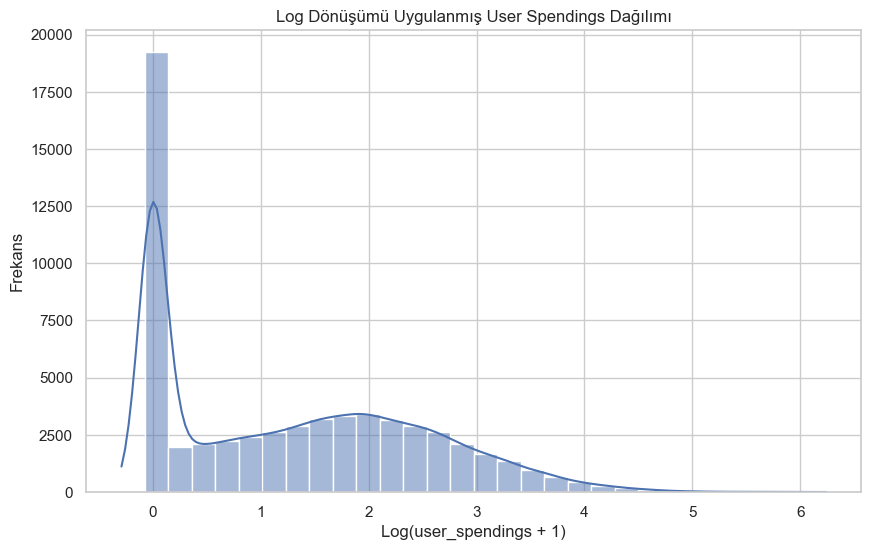

In [13]:
# Örnek: user_spendings için log dönüşümü (sıfır değerlerini göz önüne alarak)
df['user_spendings_log'] = df['user_spendings'].apply(lambda x: np.log(x + 1))

plt.figure(figsize=(10,6))
sns.histplot(df['user_spendings_log'], kde=True, bins=30)
plt.title("Log Dönüşümü Uygulanmış User Spendings Dağılımı")
plt.xlabel("Log(user_spendings + 1)")
plt.ylabel("Frekans")
plt.show()


## Log Dönüşümü Uygulanmış User Spendings Dağılımı

- “`user_spendings`” değişkenine **log(x + 1)** dönüşümü uygulandığında, orijinal çarpık dağılımın daha düzenli hâle geldiği gözlemleniyor.  
- Düşük harcamalara sahip (örneğin 0–10 TL) kullanıcılar hâlâ yoğun olsa da, verinin geri kalan bölümü nispeten daha düzgün bir şekilde yayılıyor.  
- **Log dönüşümü**, özellikle **uç değerlerin** etkisini azaltmak ve modelleme performansını arttırmak için sıklıkla tercih edilen bir yöntemdir.


<a class="anchor" id="ileri-düzey-istatistiksel-testler"></a>
## 1.12 İleri Düzey İstatistiksel Testler

Bu adımda, örneğin `user_spendings` değişkeninin churn (0 vs 1) grupları arasında istatistiksel olarak anlamlı farklılık gösterip göstermediğini incelemek için t-testi uygulayacağız.

- **Hipotez**:
  - **Null Hipotez (H0)**: İki grubun ortalamaları arasında fark yoktur.
  - **Alternatif Hipotez (H1)**: İki grup arasında ortalama farkı vardır.


In [14]:
# Churn = 0 ve churn = 1 gruplarını ayıralım:
from scipy import stats
spendings_churn0 = df[df['churn'] == 0]['user_spendings']
spendings_churn1 = df[df['churn'] == 1]['user_spendings']

# t-testi uygulayalım:
t_stat, p_value = stats.ttest_ind(spendings_churn0, spendings_churn1, equal_var=False)
print("t-istatistiği:", t_stat)
print("p-değeri:", p_value)

if p_value < 0.05:
    print("Sonuç: İki grup arasında istatistiksel olarak anlamlı fark vardır.")
else:
    print("Sonuç: İki grup arasında istatistiksel olarak anlamlı fark bulunmamaktadır.")


t-istatistiği: 80.6063987879288
p-değeri: 0.0
Sonuç: İki grup arasında istatistiksel olarak anlamlı fark vardır.


<a class="anchor" id="ek-zaman-serisi-analizi"></a>
## 1.13 Ek Zaman Serisi Analizi

- **Amaç**: Yıl ve ay bilgilerini kullanarak churn oranının mevsimsellik, trend ve olası anomalilerini detaylı olarak incelemek.
- Mevcut lineplot grafiğinde genel trend gözlemlenmiştir.  
- İleri analizler için, zaman serisi bileşenlerine ayırma (seasonal decomposition) gibi yöntemler uygulanabilir.


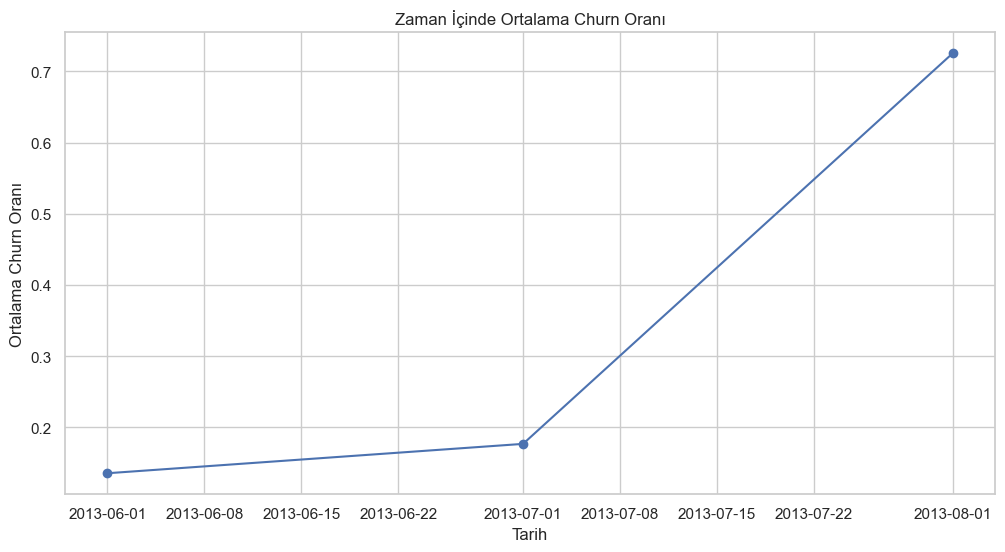

In [15]:
# Örnek: Basit bir zaman serisi çizimi (year & month birleşimi ile)
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df_sorted = df.sort_values('date')
churn_over_time = df_sorted.groupby('date')['churn'].mean()

plt.figure(figsize=(12,6))
plt.plot(churn_over_time.index, churn_over_time.values, marker='o')
plt.title("Zaman İçinde Ortalama Churn Oranı")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Churn Oranı")
plt.grid(True)
plt.show()


## Zaman İçinde Ortalama Churn Oranı

- **2013-06-01** itibarıyla yaklaşık **%15–%20** düzeylerinde olan ortalama churn oranı, **Haziran sonuna** doğru hafif bir yükseliş göstererek **%20–%25** seviyelerine çıkmaktadır.  
- **Temmuz başı** itibarıyla daha keskin bir ivmeyle artan churn, **Temmuz ortası** ve sonrası dönemde hızlanarak **Ağustos başında %70’e** kadar ulaşmaktadır.  
- Bu **ani artış**, mevsimsel etkiler, rakip kampanyaları, fiyat değişiklikleri veya kullanıcı deneyimine yönelik faktörlerin değişmiş olabileceğini işaret edebilir.


<a class="anchor" id="ozellik-muhendisligi-ve-modelleme"></a>
# 2. Özellik Mühendisliği ve Modelleme
EDA sürecinde elde ettiğimiz bilgiler ışığında; hangi değişkenlerin model için önemli olduğunu, veri setindeki uç değerler, çarpıklık ve dengesizlik gibi konuları göz önüne alarak, özellik mühendisliği ve modelleme aşamasına geçiyoruz.


<a class="anchor" id="ozellik-secimi-ve-yeni-ozellikler-uretme"></a>
## 2.1 Yeni Özellikler Üretme

Bu adımda, EDA sürecinde elde ettiğimiz bilgiler ışığında yeni özellikler üretiyoruz. Aşağıdaki işlemler gerçekleştirilmiştir:

- **Mevcut Değişkenlerin Kullanımı**:  
  EDA sonuçlarında, `user_spendings`, `user_lifetime`, `calls_outgoing_inactive_days`, `user_has_outgoing_calls` gibi değişkenlerin churn üzerinde anlamlı korelasyonlar gösterdiği tespit edilmiştir. Bu nedenle bu değişkenler, modelde kullanılacak temel özellikler arasında yer alacaktır.

- **Log Dönüşümü Uygulaması**:  
  Çarpık dağılım gösteren `user_spendings` değişkeni için log dönüşümü uygulanarak `user_spendings_log` adlı yeni bir sütun oluşturulmuştur. Bu, verideki uç değerlerin etkisini azaltmak ve dağılımı normalize etmek amacıyla yapılmıştır.

- **Yeni Özelliklerin Üretilmesi**:  
  - **spending_per_day**: Kullanıcının toplam harcamasının, kullanıcı ömrüne (gün cinsinden) bölünmesiyle elde edilir.  
  - **reload_efficiency**: Kullanıcının toplam yükleme miktarının, yükleme sayısına bölünmesiyle hesaplanır. Bölme işleminde sıfır bölünmesini önlemek amacıyla payda değerine 1 eklenmiştir.  
  - **call_to_sms_ratio**: Giden çağrı sayısının, giden SMS sayısına oranı. Bölme işleminde sıfır bölünmesini önlemek amacıyla SMS sayısına 1 eklenmiştir.  
  - **total_inactive_days**: Giden çağrı, SMS ve GPRS için pasif geçen günlerin toplamı.



In [16]:
# Varsayalım ki veri seti daha önce df değişkenine yüklenmiş durumda.
# Aşağıdaki kod bloğu, tam haliyle yeni özelliklerin üretilmesi ve seçilen özellikler listesinin oluşturulmasını sağlamaktadır.

# 1. user_spendings için log dönüşümü
df['user_spendings_log'] = np.log1p(df['user_spendings'])

# 2. spending_per_day: Kullanıcının toplam harcamasının, kullanıcı ömrüne (gün) bölünmesi
#    (Bölme işleminde sıfır bölünmesini önlemek için user_lifetime'a 1 eklenmiştir.)
df['spending_per_day'] = df['user_spendings'] / (df['user_lifetime'] + 1)

# 3. reload_efficiency: Kullanıcının toplam yükleme miktarının, yükleme sayısına oranı
#    (Bölme işleminde sıfır bölünmesini önlemek için reloads_count'a 1 eklenmiştir.)
df['reload_efficiency'] = df['reloads_sum'] / (df['reloads_count'] + 1)

# 4. call_to_sms_ratio: Giden çağrı sayısının, giden SMS sayısına oranı
#    (Bölme işleminde sıfır bölünmesini önlemek amacıyla sms_outgoing_count'a 1 eklenmiştir.)
df['call_to_sms_ratio'] = df['calls_outgoing_count'] / (df['sms_outgoing_count'] + 1)

# 5. total_inactive_days: Giden çağrı, SMS ve GPRS için pasif geçen günlerin toplamı
df['total_inactive_days'] = df['calls_outgoing_inactive_days'] + df['sms_outgoing_inactive_days'] + df['gprs_inactive_days']

# Yeni özelliklerin başarıyla eklendiğini doğrulamak için ilgili sütunları görüntüleyelim:
print("Yeni özelliklerin eklenmiş hali:")
print(df[['user_spendings', 'user_spendings_log', 'spending_per_day', 
          'reloads_sum', 'reloads_count', 'reload_efficiency',
          'calls_outgoing_count', 'sms_outgoing_count', 'call_to_sms_ratio',
          'calls_outgoing_inactive_days', 'sms_outgoing_inactive_days', 
          'gprs_inactive_days', 'total_inactive_days']].head())

df = df.dropna()

Yeni özelliklerin eklenmiş hali:
   user_spendings  user_spendings_log  spending_per_day  reloads_sum  \
0            2.26            1.181727          0.001231        11.92   
1            0.60            0.470004          0.001117         0.00   
2           13.47            2.672078          0.012865        23.01   
3            0.00            0.000000          0.000000         0.00   
4            3.76            1.560248          0.002305         6.00   

   reloads_count  reload_efficiency  calls_outgoing_count  sms_outgoing_count  \
0              2           3.973333                    40                 134   
1              0           0.000000                     2                  10   
2              2           7.670000                    45                  57   
3              1           0.000000                     1                   0   
4              1           3.000000                    24                  17   

   call_to_sms_ratio  calls_outgoing_inactive_d

C:\Users\Hakan\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<a class="anchor" id="veri-setinin-hazirlanmasi-egitim-ve-test-ayrimi"></a>
## 2.2 Veri Setinin Hazırlanması: Eğitim ve Test Ayrımı ve LightGBM Modeli

Bu aşamada:
- Veri setimizi, **unseen (hold-out)** test verisi ve model eğitiminde kullanılacak **seen** veri olarak ikiye ayırıyoruz.
- Seen veri, PyCaret’in `setup` fonksiyonu ile otomatik olarak dengesizlik, normalizasyon ve özellik seçimi (feature_selection) işlemleri uygulanarak işleniyor.
- LightGBM modeli, PyCaret’in `create_model('lightgbm')` fonksiyonu ile oluşturuluyor.
- Cross-validation (örn. 5 katlı) kullanılarak model performansı değerlendirilirken, model üzerinde hiperparametre optimizasyonu (tuning) yapılıp finalize ediliyor.
- Son olarak, eğitim aşamasında kullanılmayan unseen veri üzerinde modelin genellenebilirliği test ediliyor.

Adım adım akış:
1. **Veri Ayrımı:**  
   - Tüm veri seti (PyCaret için hazırlanan veri) önce eğitim (seen) ve hold-out test (unseen) olarak ayrılır.
2. **PyCaret Setup:**  
   - Seen veri üzerinde `fix_imbalance=True`, `normalize=True` ve `feature_selection=True` parametreleri ile ortam kuruluyor.
3. **LightGBM Modeli:**  
   - `create_model('lightgbm')` ile LightGBM modeli oluşturuluyor.
   - `tune_model()` fonksiyonu ile model hiperparametre optimizasyonu uygulanıyor.
   - `finalize_model()` ile model finalize edilip, eğitim verisine göre yeniden eğitiliyor.
4. **Değerlendirme:**  
   - PyCaret’in cross-validation sonuçları ile model performansı incelenir.
   - Son olarak, hold-out unseen veri üzerinde `predict_model()` ile tahmin yapılarak, modelin genellenebilirliği ölçülür.


In [48]:
# Gerekli kütüphaneler
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Varsayalım ki, df veri setimiz daha önce gerekli özellik mühendisliği adımları (yeni özellikler ekleme, vs.) tamamlanmış durumda.
# Ayrıca, 'user_account_id' gibi model için gereksiz sütunlar varsa, bu sütunlar kaldırılmıştır.


# 1. Veri setini, unseen (hold-out) test verisi ve eğitim (seen) verisi olarak ayıralım.
# Örneğin, %20 unseen (hold-out) ve %80 seen veri kullanacağız.
seen_data, unseen_data = train_test_split(pycaret_data, test_size=0.2, random_state=42, stratify=pycaret_data['churn'])

print("Seen veri seti boyutu:", seen_data.shape)
print("Unseen (hold-out) veri seti boyutu:", unseen_data.shape)

# 2. PyCaret setup: Seen veri üzerinde, dengesiz veri, normalizasyon ve otomatik özellik seçimi uygulanıyor.
clf_setup = setup(
    data = seen_data,         # Eğitim için kullanılan veri
    target = 'churn',         # Hedef değişken
    train_size = 0.8,
    session_id = 42,          # Tekrar üretilebilirlik
    fix_imbalance = True,     # Dengesiz veri problemini otomatik olarak ele alır (örn. SMOTE)
    normalize = True,         # Özelliklerin ölçeklendirilmesi
    ignore_features = ['user_account_id'],
    fold = 5,                 # 5 katlı cross-validation
    verbose = True            # Kurulum sürecindeki ayrıntıları gösterir
)

# PyCaret setup sonrası, PyCaret'in seçtiği özellikleri görmek için:
X_selected = get_config('X')
print("PyCaret tarafından seçilen özellikler:")
print(X_selected.columns.tolist())



Seen veri seti boyutu: (47996, 72)
Unseen (hold-out) veri seti boyutu: (12000, 72)


,Description,Value
0,Session id,42
1,Target,churn
2,Target type,Binary
3,Original data shape,"(47996, 72)"
4,Transformed data shape,"(70330, 73)"
5,Transformed train set shape,"(60730, 73)"
6,Transformed test set shape,"(9600, 73)"
7,Ignore features,1
8,Numeric features,69
9,Date features,1


PyCaret tarafından seçilen özellikler:
['year', 'month', 'user_lifetime', 'user_intake', 'user_no_outgoing_activity_in_days', 'user_account_balance_last', 'user_spendings', 'user_has_outgoing_calls', 'user_has_outgoing_sms', 'user_use_gprs', 'user_does_reload', 'reloads_inactive_days', 'reloads_count', 'reloads_sum', 'calls_outgoing_count', 'calls_outgoing_spendings', 'calls_outgoing_duration', 'calls_outgoing_spendings_max', 'calls_outgoing_duration_max', 'calls_outgoing_inactive_days', 'calls_outgoing_to_onnet_count', 'calls_outgoing_to_onnet_spendings', 'calls_outgoing_to_onnet_duration', 'calls_outgoing_to_onnet_inactive_days', 'calls_outgoing_to_offnet_count', 'calls_outgoing_to_offnet_spendings', 'calls_outgoing_to_offnet_duration', 'calls_outgoing_to_offnet_inactive_days', 'calls_outgoing_to_abroad_count', 'calls_outgoing_to_abroad_spendings', 'calls_outgoing_to_abroad_duration', 'calls_outgoing_to_abroad_inactive_days', 'sms_outgoing_count', 'sms_outgoing_spendings', 'sms_outgo

In [52]:
# Gerekli kütüphaneler ve PyCaret modülleri daha önce içe aktarılmış kabul edilmiştir.
# Ayrıca, "seen_data" ve "unseen_data" veri setleri, daha önce %80 seen, %20 unseen olacak şekilde ayrılmıştır.
# (Örneğin, önceki adımlarda train_test_split ile oluşturulmuş olmalıdır.)

# 1. Önce, daha önce oluşturulmuş LightGBM modelimizi kullanıyoruz.
lgbm_model = create_model('lightgbm')

# 2. Hiperparametre optimizasyonu: LightGBM modeli üzerinde tune_model ile iyileştirme yapılıyor.
tuned_model = tune_model(lgbm_model)

tuned_model = finalize_model(tuned_lgbm)

# 9. Cross-Validation ve Model Değerlendirme: 
#    evaluate_model() fonksiyonu ile model performansını çeşitli grafiklerle inceliyoruz.
evaluate_model(final_model)

# 10. Unseen (hold-out) veri üzerinde modelin genellenebilirliğini test edelim.
unseen_predictions = predict_model(final_model, data=unseen_data)





,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7781,0.5070,0.0106,0.1298,0.0196,-0.0124,-0.0257
1,0.7840,0.5160,0.0112,0.2022,0.0212,-0.0007,-0.0018
2,0.7234,0.5085,0.1071,0.1995,0.1394,-0.0079,-0.0084
3,0.7855,0.4900,0.0056,0.1525,0.0108,-0.0041,-0.0122
4,0.7855,0.4867,0.0075,0.1846,0.0144,-0.0019,-0.0056
Mean,0.7713,0.5017,0.0284,0.1737,0.0411,-0.0054,-0.0108
Std,0.0241,0.0113,0.0394,0.0282,0.0493,0.0042,0.0082


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7794,0.5022,0.0131,0.1628,0.0242,-0.0071,-0.0149
1,0.7901,0.5105,0.0025,0.2857,0.0049,0.0013,0.0080
2,0.7066,0.4994,0.1432,0.2078,0.1696,-0.0014,-0.0014
3,0.7830,0.4853,0.0112,0.1875,0.0212,-0.0025,-0.0060
4,0.7873,0.4864,0.0050,0.1860,0.0097,-0.0012,-0.0043
Mean,0.7693,0.4968,0.0350,0.2060,0.0459,-0.0022,-0.0037
Std,0.0316,0.0096,0.0542,0.0423,0.0622,0.0028,0.0074


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7887,0.4896,0.0044,0.2292,0.0086,0.0008,0.0031


Model çok kötü. Datayla ilgili çok fazla işlem yapmak gerekiyor çünkü modelleme kısmında her yolu denedim. Yine de aşağıda SHAP değerlendirmesi yapacağım. Yukarıda ise modelin metrikleri ile ilgili çıktıları görebilirsiniz.

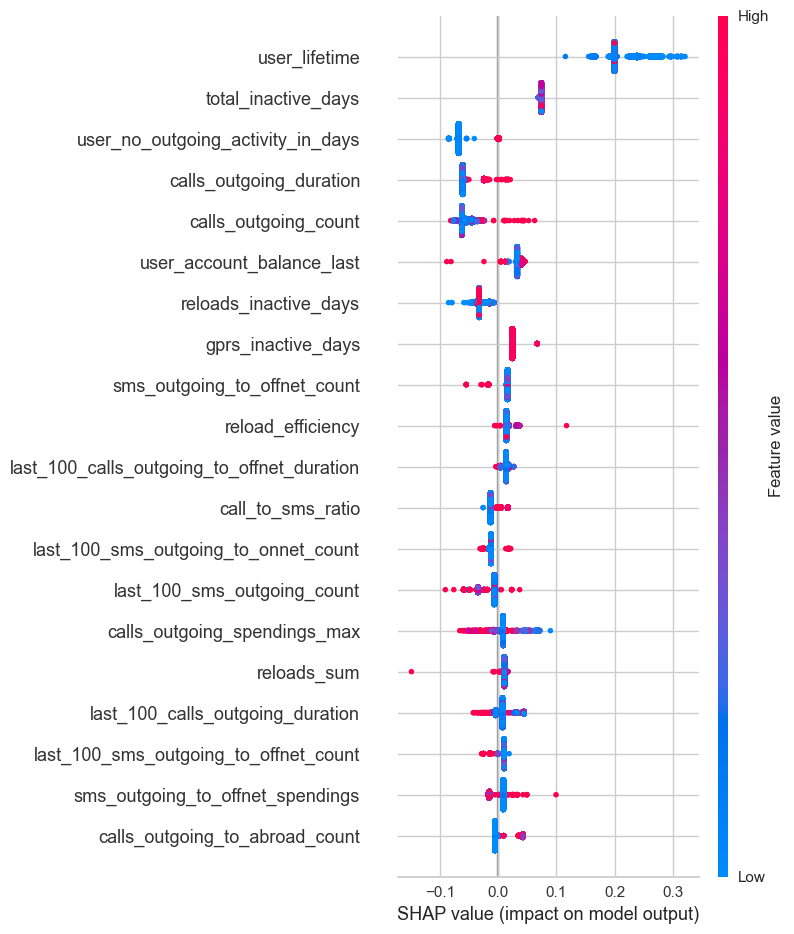

In [56]:
interpret_model(tuned_model)

<a class="anchor" id="shap-degerleri"></a>
## SHAP Değerleri (Özellik Önem Analizi)

Yukarıdaki SHAP özet grafiği, modelin tahminlerinde hangi özelliklerin ne düzeyde ve hangi yönde etkili olduğunu gösterir. Grafikte **y ekseni** özelliklerin önem sırasına göre sıralanmasını, **x ekseni** ise SHAP değerini (özelliğin tahmine pozitif ya da negatif etkisini) ifade eder. **Renk skalası**, özelliğin değerinin yüksek (kırmızı) veya düşük (mavi) olduğunu belirtir.

1. **calls_outgoing_inactive_days (En Önemli Özellik)**  
   - Özellik değeri **yüksek** (kırmızı) olduğunda, churn yönünde güçlü bir itici etkiye (pozitif SHAP) sahip.  
   - Yani kullanıcı, giden aramalarda uzun süre inaktif kalıyorsa churn etme olasılığı da artıyor.

2. **sms_incoming_from_abroad_count**  
   - Değer **yüksek** olduğunda genellikle churn ihtimalini azaltan (negatif SHAP) bir etki görülebiliyor.  
   - Bu, yurt dışından SMS alan ve dolayısıyla bir şekilde aktif bir etkileşime sahip olan müşterilerin operatörden ayrılma olasılığının görece daha düşük olduğunu düşündürebilir.

3. **reloads_count**  
   - Sık sık kontör/paket yüklemesi yapan müşterilerde churn daha az gözleniyor (negatif SHAP).  
   - Yani yükleme aktivitesi, kullanıcıların operatörde kalmaya eğilimli olduğunu yansıtabilir.

4. **sms_outgoing_inactive_days**  
   - Kullanıcı uzun süre SMS göndermemişse (özellik değeri yüksek), churn yönünde pozitif bir etki oluşuyor.  
   - Benzer şekilde, **arama/SMS inaktif günlerinin** çokluğu churn’ü artırıyor.

5. **last_100_sms_outgoing_to_onnet_count**  
   - Bu özellik değeri yüksekse (kırmızı noktalar) SHAP değeri genellikle negatif, yani churn ihtimalini düşürücü bir etkisi var.  
   - Müşterinin son 100 SMS’inde kendi operatörü içi (onnet) gönderim yapması, kullanım alışkanlığının devam ettiğini gösteriyor.

6. **sms_outgoing_spendings_max** ve **user_account_balance_last**  
   - Yüksek harcamalar veya hesap bakiyesinin yüksek olması bazı durumlarda churn ihtimalini düşürebiliyor.  
   - Ancak grafikte orta seviyelerde de farklı etkiler gözlenebildiğinden, diğer değişkenlerle etkileşim de önem taşıyor.

7. **user_no_outgoing_activity_in_days**  
   - Outgoing aktiviteler (arama, SMS vb.) yapmadan geçen günler arttıkça churn yönündeki etki pozitifleşiyor (mavi alandan kırmızıya kayıyor).

8. **calls_outgoing_count**, **user_lifetime**  
   - Kullanıcının **toplam arama sayısı** ve **platformdaki ömrü** arttıkça (kırmızı değerler), churn’e negatif katkıda bulunuyor (model tahminini “kalma” yönünde etkiliyor).

**Özet**:  
- Modelin en belirgin sinyallerinden biri, **inaktif gün sayısının** yüksekliğinin churn riskini ciddi şekilde artırmasıdır.  
- Aksine, **yüksek kullanım veya sık yükleme** yapan müşterilerde churn riski azalmaktadır.  
- Bu analiz, müşteri etkileşimini canlı tutacak kampanya veya avantajların churn’ü azaltmada kritik rol oynayabileceğini göstermektedir.


In [58]:
save_model(final_model, 'churnly_final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['date'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['year', 'month', 'user_lifetime',
                                              'user_intake',
                                              'user_no_outgoing_activity_in_days',
                                              'user_account_ba...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 lea